In [1]:
#matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import math
import sys
import os
from random import shuffle
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fmin
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.signal import savgol_filter
from random import gauss
import matplotlib.ticker as ticker


from funcfssa import autoscale, scaledata   #usual scaling
from funcfssa2 import autoscale2, scaledata2  #correction in y
from funcfssa3 import autoscale3, scaledata3  #added correction in x

%matplotlib inline


j2 = 1.0
j6 = 1.0
Kc = 0.0
lambda3 = 2.1
q_Q = 1
N_og = [40, 60, 80, 100, 120, 140, 160, 180, 200, 240, 260, 340, 380]
N_list = N_og
#N_og = [40, 60, 80, 100, 120, 140, 160, 180, 200]
N_list = N_og

#N_fit_cv = 200
N_fit_cv = 300
####
#code
###

cv_ind = 1
chi_ind = 10 #for chi_sigma
m_ind = 9 #for m_sigma


data = np.load('Delta1_data_v2.npy',allow_pickle=True)


######
#-----------------------------------------------------------------------------------------------------------------------
#######
#parameters of the code
######
#-----------------------------------------------------------------------------------------------------------------------
######



#size_investigate = [20, 32]
Blocks = ['*','o', 'v', 'd','s','+', 'x']
#colors_size = ['blue', 'red', 'green', 'brown']

cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='brg_r')
colors_size = [scalarMap.to_rgba(i/(len(N_list)+ 2-1)) for i in range(len(N_list))]


In [14]:
### scaling of specific heat
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = cv_ind  #here choose your fit
scaleC = 1
rhos = np.array(data[-1][0])


for i in range(len(N_list)):
    i_og = i 
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1]
    prelim_x = data[i_og][0] 
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

#init_guess = [1.2, 5/6, 1/3]
init_guess = [1.2, 5/6, 0.3, 0.1, 0.1]
#init_guess = [1.2, 5/6, 1/3, 0.1, 0.1, 0.1, 0.1]

#noisy_ret = autoscale(ls, rhos, a_arr, da_arr, *init_guess)
#noisy_ret = autoscale2(ls, rhos, a_arr, da_arr, *init_guess)
#noisy_ret = autoscale3(ls, rhos, a_arr, da_arr, *init_guess)

if 0:
    print('values: Tc, nu, zeta, omega, a')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

#noisy_auto_scaled_data =scaledata(ls, rhos, a_arr, da_arr, *noisy_ret['x'])
#noisy_auto_scaled_data =scaledata2(ls, rhos, a_arr, da_arr, *noisy_ret['x'])
#noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *noisy_ret['x'])


######
#create the fit with the following values
######
testV = [ 1.202,  1.66,  0.66,  0.29,  128.0,  0.08, 1.59];
noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *testV)



1.202


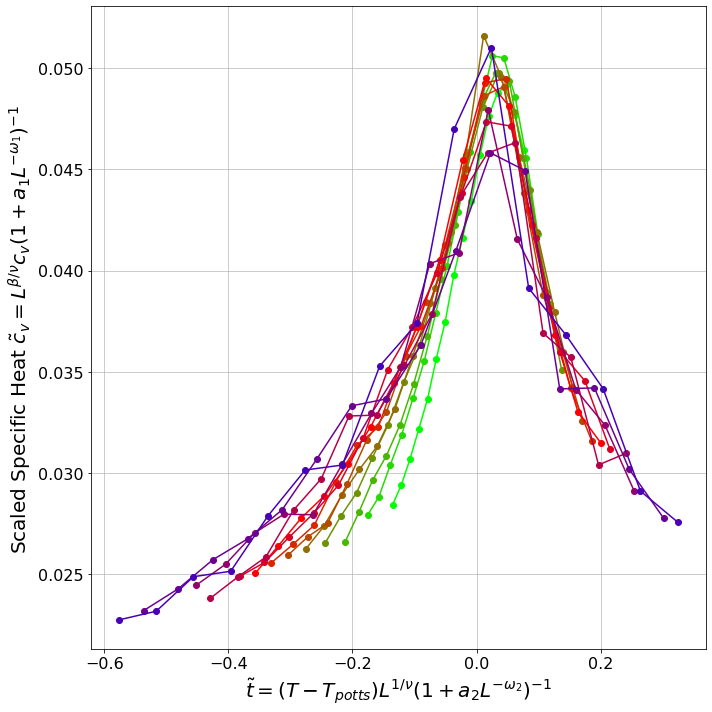

In [15]:
if True:

    #fig, ax = plt.subplots(1,figsize=(15,10))
    fig, ax = plt.subplots( figsize = (10,10))
    #fig.set_size_inches(12,6)
    #fig.set_dpi(100)

    #specific heat 
    for i in range(len(N_list)):
        #hand test
        #noisy_auto_scaled_data =scaledata2(ls, rhos, a_arr, da_arr, *testV)
        y_val = (noisy_auto_scaled_data.y.T)[:,i]
        x_val = (noisy_auto_scaled_data.x.T)[:,i]
        
        #new_dat = scaledata2(ls, rhos, a_arr, da_arr, *[1.203, 5/6, 1/3, 0.05, 0.05])
        #y_val = (new_dat.y.T)[:,i]
        #x_val = (new_dat.x.T)[:,i]
        ax.plot(x_val, y_val, marker ='o', linestyle = '-', color=colors_size[i])

    #ax.set_xlabel(r"$\tilde{t} = (T - T_{potts})L^{1/\nu} (1 + a_2 L^{-\omega_2})^{-1}$", fontsize=20);
    #ax.set_ylabel(r'Scaled Specific Heat $\tilde{c}_{v} = L^{\beta/\nu} c_{v} (1 + a_1 L^{-\omega_1})^{-1}$ ', fontsize=20);
    ax.set_xlabel(r"$\tilde{t} = (T - T_{potts})L^{1/\nu} (1 + a_2 L^{-\omega_2})^{-1}$", fontsize=20);
    ax.set_ylabel(r'Scaled Specific Heat $\tilde{c}_{v} = L^{\beta/\nu} c_{v} (1 + a_1 L^{-\omega_1})^{-1}$ ', fontsize=20);


    #do the legend and append at the end
    patches_lg = []
    for i in range(len(N_list)):
        patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
    #ax.legend(handles=patches_lg, loc='upper right', bbox_to_anchor=(0.98,0.95), ncol=1,fontsize = 20)
    ax.grid(which='major', axis='both', linestyle='-', alpha = 0.8)
    ax.grid(which='minor', axis='both', linestyle='-', alpha = 0.3)
    ax.tick_params(axis='both', which='major', labelsize=16)


    fig.tight_layout()

    plt.savefig('./scaledCV.png', format='png', dpi = 100, bbox_inches='tight')
    plt.show()

In [29]:
### scaling of magnetization
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = m_ind  #here choose your fit
scaleC = 0
rhos = np.array(data[-1][0])


for i in range(len(N_list)):
    i_og = i 
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1]
    prelim_x = data[i_og][0] 
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

scale = 0

if scale == 3:
    init_guess = [1.2, 5/6, 1/9, 0.1, 0.1, 0.1, 0.1]

    noisy_ret = autoscale3(ls, rhos, a_arr, da_arr, *init_guess);


    print('values: Tc, nu, zeta, omega, a')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

    noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *noisy_ret['x']);

elif scale == 2:
    
    init_guess = [1.2, 5/6, 1/9, 0.1, 0.1]

    noisy_ret = autoscale2(ls, rhos, a_arr, da_arr, *init_guess)


    print('values: Tc, nu, zeta, omega, a')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

    noisy_auto_scaled_data =scaledata2(ls, rhos, a_arr, da_arr, *noisy_ret['x'])
    
    
elif scale == 0:
    
    init_guess = [ 1.20161639,  1.14453413, -0.20357497, 0.90850487,  0.32709953,  0.25217392, -0.13907326]


    noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *init_guess);


1.20161639


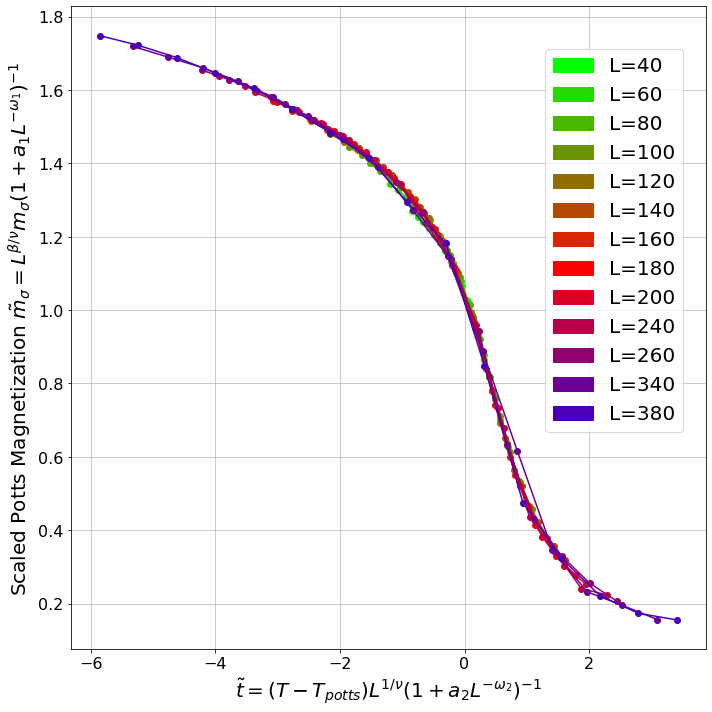

In [30]:
if True:

    #fig, ax = plt.subplots(1,figsize=(15,10))
    fig, ax = plt.subplots( figsize = (10,10))
    #fig.set_size_inches(12,6)
    #fig.set_dpi(100)

    #specific heat 
    for i in range(len(N_list)):
        y_val = (noisy_auto_scaled_data.y.T)[:,i]
        x_val = (noisy_auto_scaled_data.x.T)[:,i]
        ax.plot(x_val, y_val, marker ='o', linestyle = '-', color=colors_size[i])

    ax.set_xlabel(r"$\tilde{t} = (T - T_{potts})L^{1/\nu} (1 + a_2 L^{-\omega_2})^{-1}$", fontsize=20);
    ax.set_ylabel(r'Scaled Potts Magnetization $\tilde{m}_{\sigma} = L^{\beta/\nu} m_{\sigma} (1 + a_1 L^{-\omega_1})^{-1}$ ', fontsize=20);


    #do the legend and append at the end
    patches_lg = []
    for i in range(len(N_list)):
        patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
    ax.legend(handles=patches_lg, loc='upper right', bbox_to_anchor=(0.98,0.95), ncol=1,fontsize = 20)
    ax.grid(which='major', axis='both', linestyle='-', alpha = 0.8)
    ax.grid(which='minor', axis='both', linestyle='-', alpha = 0.3)
    ax.tick_params(axis='both', which='major', labelsize=16)


    fig.tight_layout()

    plt.savefig('./scaledMag.png', format='png', dpi = 100, bbox_inches='tight')
    plt.show()

In [46]:
### scaling of susceptibility
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = chi_ind  #here choose your fit
scaleC = 1
tstart = 1.20 
uind = np.argmin(np.absolute(prelim_x_p - tstart))
rhos = np.array(data[-1][0])[uind:]


for i in range(len(N_list)):
    i_og = i 

    prelim_x_p = data[i_og][0] 
    uind = np.argmin(np.absolute(prelim_x_p - tstart))
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1][uind:]    
    prelim_x = prelim_x_p[uind:]
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

if 0:

    ### scaling of magnetization
    ###

    ls = N_list
    a_arr = []
    da_arr = []
    flat_temp = []
    ind = chi_ind  #here choose your fit
    scale = 1

    for i in range(len(N_list)):
        i_og = i + 2
        range_x = data[i_og][0]
        uind = np.argmin(np.absolute(range_x - tstart))
        #start chi data right before the hump

        a_arr.append((N_list[i]**(2*scale))*data[i_og][2*ind + 1][uind:])
        da_arr.append((N_list[i]**(scale))*data[i_og][2*ind + 2][uind:])
        flat_temp.append(range_x[uind:])

    a_arr = np.array(a_arr)
    da_arr = np.array(da_arr)
    rhos = np.array(flat_temp[0])

scale = 0

if scale == 3:
    init_guess = [1.2, 5/6, 13/9, 0.1, 0.1, 0.1, 0.1]

    noisy_ret = autoscale3(ls, rhos, a_arr, da_arr, *init_guess)


    print('values: Tc, nu, zeta, omega, a')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

    noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *noisy_ret['x'])

elif scale == 2:
    
    init_guess = [1.2, 5/6, 13/9, 0.1, 0.1]

    noisy_ret = autoscale2(ls, rhos, a_arr, da_arr, *init_guess)


    print('values: Tc, nu, zeta, omega, a')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

    noisy_auto_scaled_data =scaledata2(ls, rhos, a_arr, da_arr, *noisy_ret['x'])
    
elif scale == 1:
    
    init_guess = [1.2, 5/6, 13/9]

    noisy_ret = autoscale(ls, rhos, a_arr, da_arr, *init_guess)


    print('values: Tc, nu, zeta')
    print(noisy_ret['x'])
    print('errors')
    print(noisy_ret['errors'])

    noisy_auto_scaled_data =scaledata(ls, rhos, a_arr, da_arr, *noisy_ret['x'])
    
elif scale == 0:
    
    init_guess = [1.20348593, 0.94384007, 1.33891034, 0.10150177, 0.10349202, 0.09839144, 0.09746544]
    #init_guess = [1.203, 0.95, 13/9, 0.1, 0.1, 0.1, 0.1]

    noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *init_guess)


1.20348593


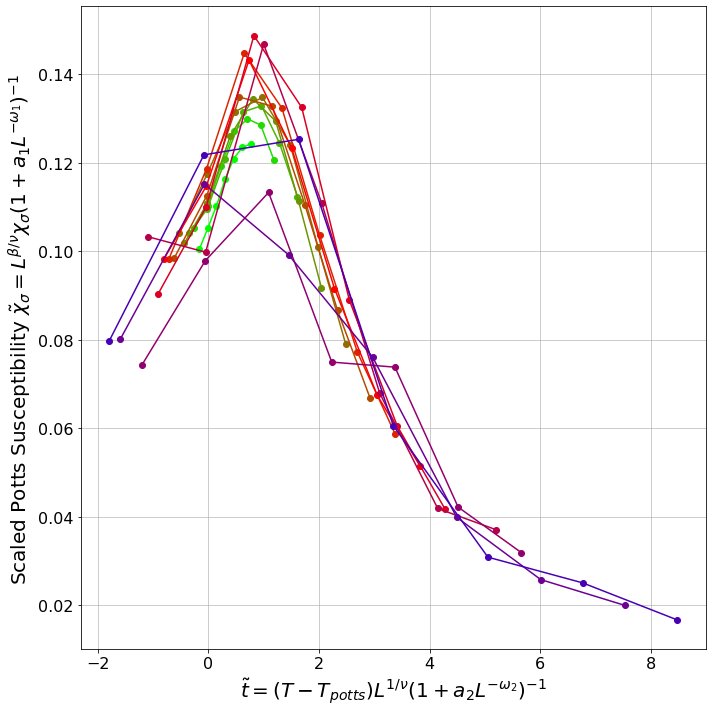

In [45]:
if True:

    #fig, ax = plt.subplots(1,figsize=(15,10))
    fig, ax = plt.subplots( figsize = (10,10))
    #fig.set_size_inches(12,6)
    #fig.set_dpi(100)

    #specific heat 
    for i in range(len(N_list)):
        #y_val = (N_list[i]**(2*scale))*data_thermo[i][:,ind]
        #x_val = range_x[0]
        y_val = (noisy_auto_scaled_data.y.T)[:,i]
        x_val = (noisy_auto_scaled_data.x.T)[:,i]
        ax.plot(x_val, y_val, marker ='o', linestyle = '-', color=colors_size[i])

    ax.set_xlabel(r"$\tilde{t} = (T - T_{potts})L^{1/\nu} (1 + a_2 L^{-\omega_2})^{-1}$", fontsize=20);
    ax.set_ylabel(r'Scaled Potts Susceptibility $\tilde{\chi}_{\sigma} = L^{\beta/\nu} \chi_{\sigma} (1 + a_1 L^{-\omega_1})^{-1}$ ', fontsize=20);


    #do the legend and append at the end
    patches_lg = []
    for i in range(len(N_list)):
        patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
    #ax.legend(handles=patches_lg, loc='upper right', bbox_to_anchor=(0.98,0.95), ncol=1,fontsize = 20)
    ax.grid(which='major', axis='both', linestyle='-', alpha = 0.8)
    ax.grid(which='minor', axis='both', linestyle='-', alpha = 0.3)
    ax.tick_params(axis='both', which='major', labelsize=16)

    fig.tight_layout()

    plt.savefig('./scaledSusc.png', format='png', dpi = 100, bbox_inches='tight')
    plt.show()